# Implementation of stochastic and batch grandient descent in

We will use very simple home prices data set to implement batch and stochastic gradient descent in python.

Batch gradient descent uses all training sample in forward pass to calculate cumulitive error and that we abjust weights using derivaties. In stocchastic GD, we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights. So the key difference here is that to abjust weights batch GD Will use all training sample where as stochastic GD will use randomly picked traning sample


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/homeprices_banglore.csv')
df.head(5)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


Preprocessing / Scaling: Since our columns are on different sacle it is importan to perform scaling on them  

In [4]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis = 'columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [9]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [10]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

We should convert target columns (price) into one dimensional array. Is has become 2D due to scalling that we did above but now we should change to 1D

In [11]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

Gradient descent allows you to find weights (w1, w2, w3) and bias in following linear equation for housing price prediction

![nn.png](https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/0981fe55db7a7abf19ff1d852d9a59153289641e/8_sgd_vs_gd/hp.jpg)


Now is the time to implenment mini batch gradient descent

In [16]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  # numpy array with 1 row and columns equal to number of features.
  # our case number_of_features = 2 (area, bedroom)
  w = np.ones(shape=(number_of_features))
  b = 0
  total_sample = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w, X.T) + b

    w_grad = -(2 / total_sample) * (X.T.dot(y_true - y_predicted))
    b_grad = -(2 / total_sample) * np.sum(y_true - y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(y_true - y_predicted)) # MSE(Mean Squared Error)

    if i % 10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

Check price equation above. In that equation e were trying to find values of w1, w2 and bias. Here we got these values for each of them

w1 = 0.707112464  w2 = 0.67456527  bias = -0.23034857438407422

Now plot epochs and cost graph to see how cost reduces as number of epoch in creases  

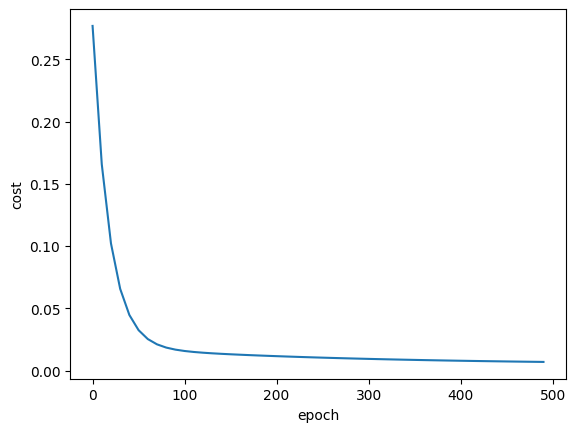

In [19]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)
plt.show()

Lets do some prediction now

In [22]:
def predict(area, bedrooms, w, b):
  scaled_X = sx.transform([[area,bedrooms]])[0]
  # here w1 = w[0], w2 = [1], w3 = w[2] and bias is b
  # equation for price is w1*area + w2*bedrooms + w3*age + bias
  # scaled_X[0] is area
  # scaled_X[1] is bedrooms
  # scaled_X[2] is age
  scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
  # once we get price prediction we need to rescal it back to original value
  # also since it return 2D array to get single value we need to do value[0][0]
  return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [23]:
predict(1000, 2, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442363

In [24]:
import random # we will use random libary to pick random training sample
random.randint(0, 6) # randint gives random number between two specified in the argument

5

# Stochatic Gradient Descent Implementation

## Stochastic GD will use randomly picked sigle training sample to calculate error and using this error we backpropage to adjust weights

In [26]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  # numpy array with 1 row and columns equal to number of features.
  # our case number_of_features = 2 (area, bedroom)
  w = np.ones(shape=(number_of_features))
  b = 0
  total_sample = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0, total_sample - 1) # random index from total sample
    sample_x = X[random_index]
    sample_y = y_true[random_index]

    y_predicted = np.dot(w, sample_x.T) + b
    w_grad = -(2 / total_sample) * (sample_x.T.dot(sample_y - y_predicted))
    b_grad = -(2 / total_sample) * (sample_y - y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.square(sample_y - y_predicted)

    if i % 100 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10000)
w_sgd, b_sgd, cost_sgd

(array([0.70656637, 0.67639792]), -0.23219521557445882, 0.0028249476457490553)

Compare this with weights and bias that we got using gradient descent. They both of quite similar

In [27]:
w, b

(array([0.70712464, 0.67456527]), -0.23034857438407422)

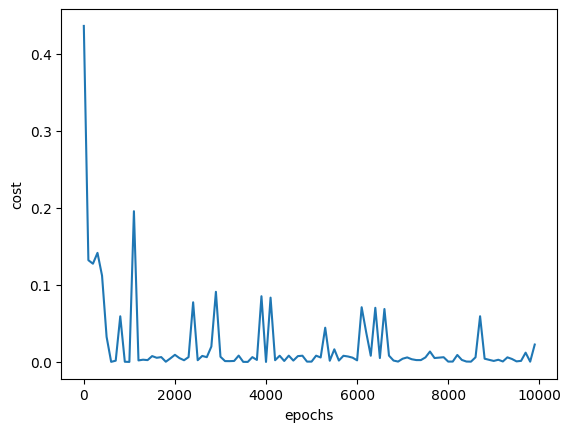

In [28]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.show()

In [30]:
predict(2600, 4, w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.34432456456742

In [32]:
predict(1000, 2, w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.060452271072165

In [35]:
predict(1521, 3, w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


70.02555307331737

In [34]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
